<a href="https://colab.research.google.com/github/Sriharshitha842/DWDM_LAB/blob/main/DWDM_LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME OF THE STUDENT : SRIHARSHITHA DEEPALA**

**REGISTRATION NUMBER : 19BCD7246**

**COURSE CODE : CSE4005**

**SLOT : L31+L32+L15+L16+L23+L24**

**LAB NUMBER : 10**

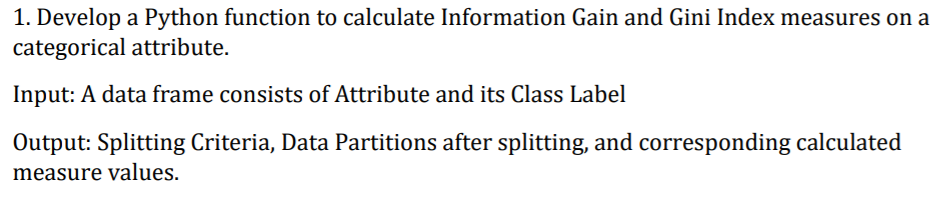

In [68]:
import pandas as pd
import io
import requests
df = pd.read_csv('/content/sample_data/tennis.csv')
print(df)

     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


In [69]:
def compute_impurity(feature, impurity_criterion):

    probs = feature.value_counts(normalize=True)

    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')

    return(round(impurity, 3))

In [70]:
import numpy as np
target_entropy = compute_impurity(df['play'], 'entropy')
target_entropy

0.94

In [71]:
df['windy'].value_counts()

False    8
True     6
Name: windy, dtype: int64

In [72]:
for level in df['windy'].unique():
    print('level name:', level)
    df_feature_level = df[df['windy'] == level]
    print('corresponding data partition:')
    print(df_feature_level)
    print('partition target feature impurity:', compute_impurity(df_feature_level['play'], 'entropy'))
    print('partition weight:', str(len(df_feature_level)) + '/' + str(len(df)))
    print('====================')

level name: False
corresponding data partition:
     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
12  overcast   hot   normal  False  yes
partition target feature impurity: 0.811
partition weight: 8/14
level name: True
corresponding data partition:
     outlook  temp humidity  windy play
1      sunny   hot     high   True   no
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
13     rainy  mild     high   True   no
partition target feature impurity: 1.0
partition weight: 6/14


In [73]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
 
    target_entropy = compute_impurity(df[target], split_criterion)
 
    entropy_list = list()
    weight_list = list()
 
 
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))
    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)
        
    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
 
    comp_feature_information_gain.information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', comp_feature_information_gain.information_gain)
   
    print('====================')
    
    return(comp_feature_information_gain.information_gain)


In [74]:
split_criteria = 'gini'
for feature in df.drop(columns='play').columns:
    feature_info_gain = comp_feature_information_gain(df, 'play', feature, split_criteria)

target feature: play
descriptive_feature: outlook
split criterion: gini
impurity of partitions: [0.48, 0.0, 0.48]
weights of partitions: [0.357, 0.286, 0.357]
remaining impurity: 0.34271999999999997
information gain: 0.11628000000000005
target feature: play
descriptive_feature: temp
split criterion: gini
impurity of partitions: [0.5, 0.444, 0.375]
weights of partitions: [0.286, 0.429, 0.286]
remaining impurity: 0.44072599999999995
information gain: 0.018274000000000068
target feature: play
descriptive_feature: humidity
split criterion: gini
impurity of partitions: [0.49, 0.245]
weights of partitions: [0.5, 0.5]
remaining impurity: 0.3675
information gain: 0.09150000000000003
target feature: play
descriptive_feature: windy
split criterion: gini
impurity of partitions: [0.375, 0.5]
weights of partitions: [0.571, 0.429]
remaining impurity: 0.428625
information gain: 0.03037500000000004


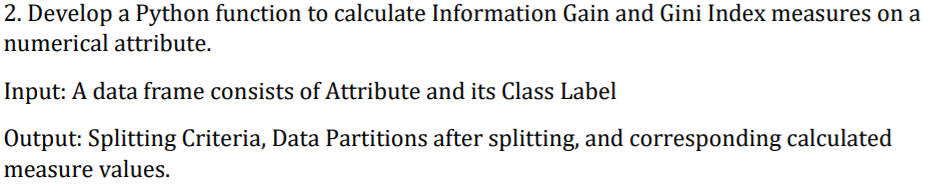

In [75]:
df1 = pd.read_csv('/content/sample_data/IRIS.csv')
print(df1)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [76]:
def compute_impurity1(feature, impurity_criterion):

    probs = feature.value_counts(normalize=True)
 
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
 
    return(round(impurity, 3))

In [77]:
target_entropy1 = compute_impurity1(df1['species'], 'entropy')
target_entropy1

1.585

In [78]:
df1['petal_width'].value_counts()

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64

In [79]:
for level in df1['petal_width'].unique():
    print('level name:', level)
    df_feature_level = df1[df1['petal_width'] == level]
    print('corresponding data partition:')
    print(df_feature_level)
    print('partition target feature impurity:', compute_impurity1(df_feature_level['species'],'entropy'))
    print('partition weight:', str(len(df_feature_level)) + '/' + str(len(df)))
    print('====================')

level name: 0.2
corresponding data partition:
    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
20           5.4          3.4           1.7          0.2  Iris-setosa
22           4.6          3.6           1.0          0.2  Iris-setosa
24           4.8          3.4           1.9 

In [80]:
def comp_feature_information_gain1(df1, target, descriptive_feature, split_criterion1):
 
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
 
    target_entropy = compute_impurity1(df1[target], split_criterion1)
 
    entropy_list1 = list()
    weight_list1 = list()
 
 
    for level in df1[descriptive_feature].unique():
        df_feature_level = df1[df1[descriptive_feature] == level]
        entropy_level = compute_impurity1(df_feature_level[target], split_criterion1)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df1)
        weight_list.append(round(weight_level, 3))
    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
 
    comp_feature_information_gain1.information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', comp_feature_information_gain1.information_gain)
 
    print('====================')
    
    return(comp_feature_information_gain1.information_gain)



In [81]:
split_criteria1 = 'gini'
for feature in df1.drop(columns='species').columns:
    feature_info_gain = comp_feature_information_gain(df1, 'species', feature, split_criteria1)


target feature: species
descriptive_feature: sepal_length
split criterion: gini
impurity of partitions: [0.198, 0.5, 0.0, 0.0, 0.32, 0.278, 0.0, 0.0, 0.0, 0.612, 0.531, 0.375, 0.408, 0.0, 0.0, 0.0, 0.408, 0.375, 0.32, 0.444, 0.0, 0.444, 0.444, 0.444, 0.278, 0.469, 0.5, 0.444, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
weights of partitions: [0.06, 0.04, 0.013, 0.027, 0.067, 0.04, 0.02, 0.033, 0.007, 0.047, 0.053, 0.027, 0.047, 0.007, 0.007, 0.007, 0.047, 0.027, 0.033, 0.06, 0.013, 0.02, 0.04, 0.04, 0.04, 0.053, 0.027, 0.02, 0.007, 0.007, 0.007, 0.02, 0.027, 0.007, 0.007]
remaining impurity: 0.319906
information gain: 0.347094
target feature: species
descriptive_feature: sepal_width
split criterion: gini
impurity of partitions: [0.0, 0.639, 0.651, 0.653, 0.444, 0.0, 0.403, 0.46, 0.0, 0.0, 0.0, 0.444, 0.611, 0.0, 0.0, 0.375, 0.49, 0.0, 0.494, 0.0, 0.444, 0.5, 0.48]
weights of partitions: [0.04, 0.173, 0.087, 0.08, 0.02, 0.013, 0.08, 0.067, 0.02, 0.007, 0.007, 0.04, 0.04, 0.007, 0.007, 0.027, 0.0

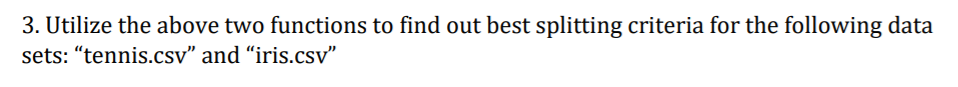



```
# The best splitting criteria of "tennis.csv" dataset can be obtained by considering "Outlook" feature as it has high information gain i.e.,0.11628000000000005
```


```
# The best splitting criteria of "iris.csv" dataset can be obtained by considering "petal_width" feature as it has high information gain i.e.,0.604321
```



